### Data fields

N - ratio of Nitrogen content in soil -  kg/ha<br>
P - ratio of Phosphorous content in soil - kg/ha  <br>
K - ratio of Potassium content in soil - kg/ha  <br>
temperature - temperature in degree Celsius <br>
humidity - relative humidity in % <br>
ph - ph value of the soil <br>
rainfall - rainfall in mm <br>

# Import libraries

In [24]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

# Import dataset

In [25]:
cropdf = pd.read_csv("../input/crop-recommendation-dataset/Crop_recommendation.csv")
cropdf.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [26]:
cropdf.shape

(2200, 8)

In [27]:
cropdf.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [28]:
cropdf.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


# Check Null and NA values

In [29]:
cropdf.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

# List of various crops

In [30]:
print("Number of various crops: ", len(cropdf['label'].unique()))
print("List of crops: ", cropdf['label'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [31]:
cropdf['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [32]:
crop_summary = pd.pivot_table(cropdf,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


# Data Visualization and analysis

## Nitrogen Analysis

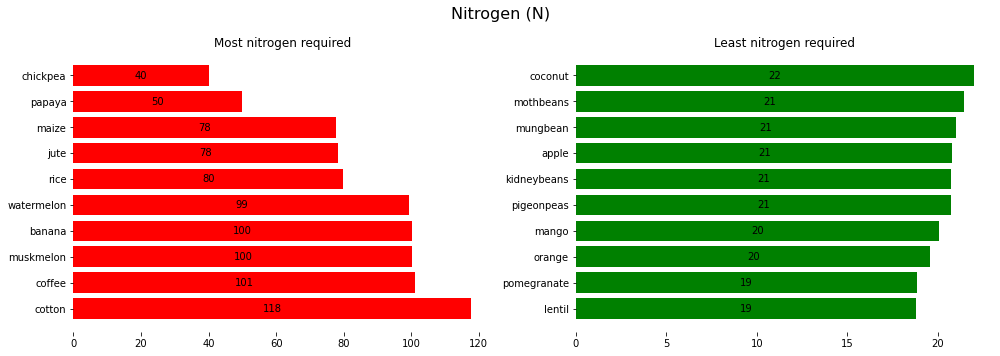

In [33]:
import matplotlib.pyplot as plt
import random

# Sort data
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)

# Prepare top and last 10
top_y = crop_summary_N['N'][0:10].sort_values().index
top_x = crop_summary_N['N'][0:10].sort_values().values

last_y = crop_summary_N['N'][-10:].index
last_x = crop_summary_N['N'][-10:].values

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), facecolor='white')

# Define colors
colorarr = ['red', 'green']

# Plot for most nitrogen
axes[0].barh(top_y, top_x, color=random.choice(colorarr))
axes[0].set_title('Most nitrogen required', color='black')
axes[0].invert_yaxis()  # Because we sorted ascending

# Plot for least nitrogen
axes[1].barh(last_y, last_x, color=random.choice(colorarr))
axes[1].set_title('Least nitrogen required', color='black')
axes[1].invert_yaxis()

# General styling
for ax in axes:
    ax.set_facecolor('white')
    ax.tick_params(colors='black')
    for spine in ax.spines.values():
        spine.set_visible(False)
    for i, (x, y) in enumerate(zip(ax.patches, ax.get_yticks())):
        ax.text(x.get_width() / 2, y, f'{x.get_width():.0f}', va='center', ha='center', color='black', fontsize=10)

# Layout adjustments
fig.suptitle('Nitrogen (N)', color='black', fontsize=16)
plt.tight_layout()
plt.show()


## Phosphorus Analysis

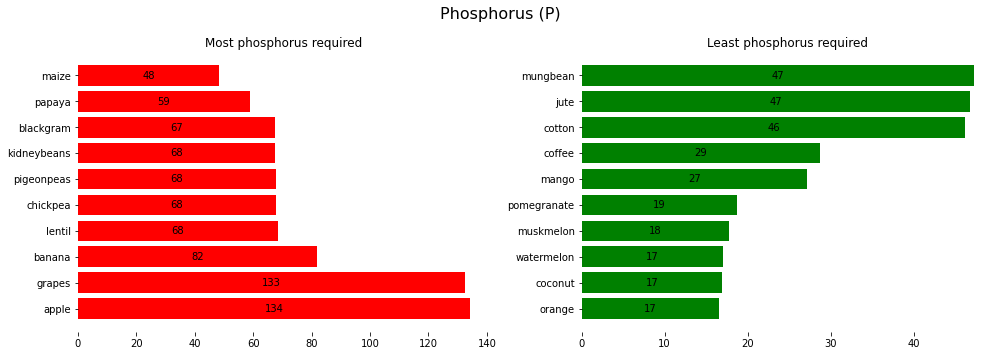

In [34]:
import matplotlib.pyplot as plt
import random

# Sort data
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)

# Prepare top and last 10
top_y = crop_summary_P['P'][0:10].sort_values().index
top_x = crop_summary_P['P'][0:10].sort_values().values

last_y = crop_summary_P['P'][-10:].index
last_x = crop_summary_P['P'][-10:].values

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), facecolor='white')

# Define colors (if not already defined)
colorarr = ['red', 'green']

# Plot for most phosphorus
axes[0].barh(top_y, top_x, color=random.choice(colorarr))
axes[0].set_title('Most phosphorus required', color='black')
axes[0].invert_yaxis()  # Because we sorted ascending

# Plot for least phosphorus
axes[1].barh(last_y, last_x, color=random.choice(colorarr))
axes[1].set_title('Least phosphorus required', color='black')
axes[1].invert_yaxis()

# General styling
for ax in axes:
    ax.set_facecolor('white')
    ax.tick_params(colors='black')
    for spine in ax.spines.values():
        spine.set_visible(False)
    for i, (x, y) in enumerate(zip(ax.patches, ax.get_yticks())):
        ax.text(x.get_width() / 2, y, f'{x.get_width():.0f}', va='center', ha='center', color='black', fontsize=10)

# Layout adjustments
fig.suptitle('Phosphorus (P)', color='black', fontsize=16)
plt.tight_layout()
plt.show()


## Potassium analysis

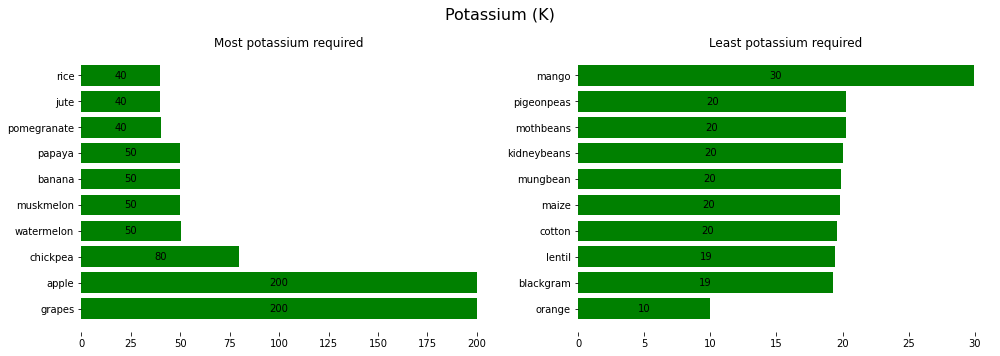

In [35]:
import matplotlib.pyplot as plt
import random

# Sort data
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)

# Prepare top and last 10
top_y = crop_summary_K['K'][0:10].sort_values().index
top_x = crop_summary_K['K'][0:10].sort_values().values

last_y = crop_summary_K['K'][-10:].index
last_x = crop_summary_K['K'][-10:].values

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), facecolor='white')

# Define colors (if not already defined)
colorarr = ['red', 'green']

# Plot for most potassium
axes[0].barh(top_y, top_x, color=random.choice(colorarr))
axes[0].set_title('Most potassium required', color='black')
axes[0].invert_yaxis()

# Plot for least potassium
axes[1].barh(last_y, last_x, color=random.choice(colorarr))
axes[1].set_title('Least potassium required', color='black')
axes[1].invert_yaxis()

# General styling
for ax in axes:
    ax.set_facecolor('white')
    ax.tick_params(colors='black')
    for spine in ax.spines.values():
        spine.set_visible(False)
    for i, (x, y) in enumerate(zip(ax.patches, ax.get_yticks())):
        ax.text(x.get_width() / 2, y, f'{x.get_width():.0f}', va='center', ha='center', color='black', fontsize=10)

# Layout adjustments
fig.suptitle('Potassium (K)', color='black', fontsize=16)
plt.tight_layout()
plt.show()


## N, P, K values comparision between crops

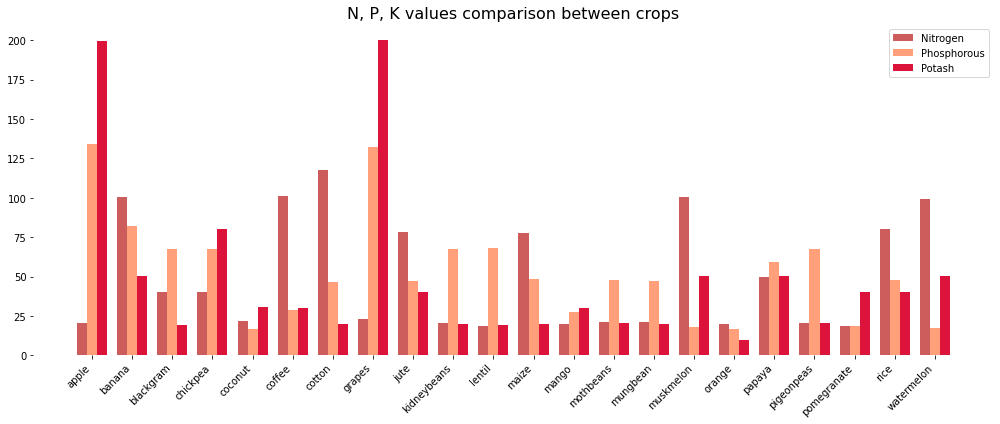

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure
fig, ax = plt.subplots(figsize=(14, 6), facecolor='white')

# Set bar width
bar_width = 0.25
index = np.arange(len(crop_summary.index))

# Plot each bar group
ax.bar(index, crop_summary['N'], bar_width, label='Nitrogen', color='indianred')
ax.bar(index + bar_width, crop_summary['P'], bar_width, label='Phosphorous', color='lightsalmon')
ax.bar(index + 2 * bar_width, crop_summary['K'], bar_width, label='Potash', color='crimson')

# Set title and labels
ax.set_title('N, P, K values comparison between crops', color='black', fontsize=16)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(crop_summary.index, rotation=45, ha='right', color='black')

# Style
ax.set_facecolor('white')
ax.tick_params(colors='black')
for spine in ax.spines.values():
    spine.set_visible(False)

ax.legend()

# Layout
plt.tight_layout()
plt.show()


## NPK ratio for rice, cotton, jute, maize, lentil 

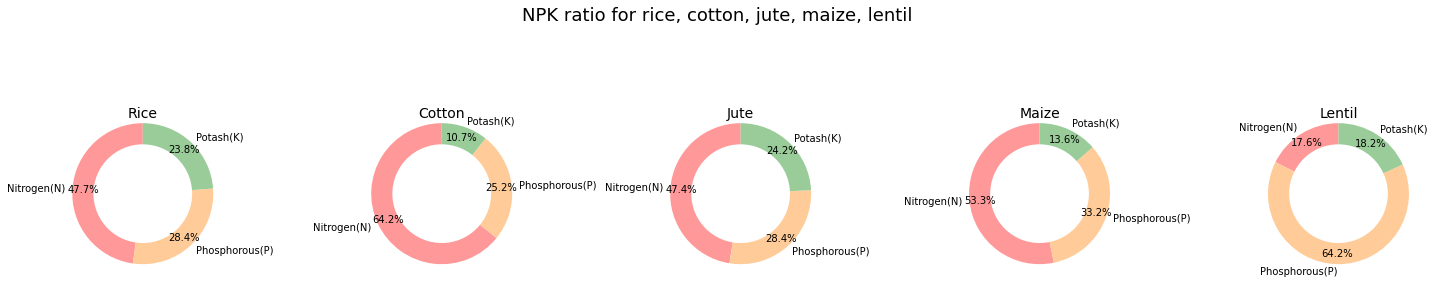

In [37]:
import matplotlib.pyplot as plt

# Labels
labels = ['Nitrogen(N)', 'Phosphorous(P)', 'Potash(K)']

# Prepare figure
fig, axes = plt.subplots(1, 5, figsize=(20, 5), subplot_kw=dict(aspect="equal"))
fig.suptitle("NPK ratio for rice, cotton, jute, maize, lentil", fontsize=18)

# Crop names and data
crops = ['rice', 'cotton', 'jute', 'maize', 'lentil']
colors = ['#FF9999', '#FFCC99', '#99CC99']  # optional: define your own colors

for ax, crop in zip(axes, crops):
    crop_npk = crop_summary.loc[crop]
    values = [crop_npk['N'], crop_npk['P'], crop_npk['K']]
    
    # Draw donut chart
    wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.1f%%',
                                      startangle=90, pctdistance=0.85, colors=colors)
    
    # Draw a white circle in the middle to make it a donut
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)
    
    # Set title inside each donut
    ax.set_title(crop.capitalize(), fontsize=14, y=0.9)

# Overall layout adjustment
plt.tight_layout()
plt.show()


## NPK ratio for fruits

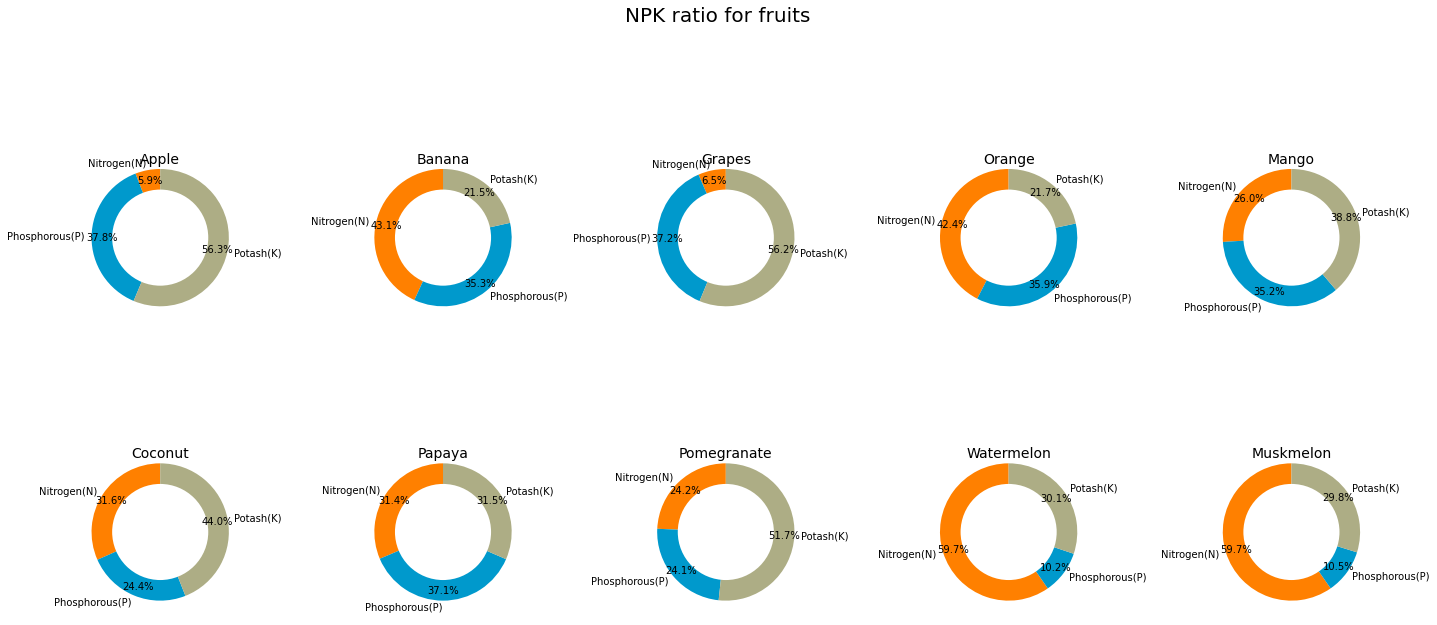

In [38]:
import matplotlib.pyplot as plt

# Labels and Colors
labels = ['Nitrogen(N)', 'Phosphorous(P)', 'Potash(K)']
colors = ['#FF8000', '#0099CC', '#ADAD85']  # cafe_colors

# Fruits list
fruits = ['apple', 'banana', 'grapes', 'orange', 'mango',
          'coconut', 'papaya', 'pomegranate', 'watermelon', 'muskmelon']

# Prepare figure
fig, axes = plt.subplots(2, 5, figsize=(20, 10), subplot_kw=dict(aspect="equal"))
fig.suptitle("NPK ratio for fruits", fontsize=20)

# Flatten axes for easy looping
axes = axes.flatten()

# Loop through each fruit
for ax, fruit in zip(axes, fruits):
    fruit_npk = crop_summary.loc[fruit]
    values = [fruit_npk['N'], fruit_npk['P'], fruit_npk['K']]
    
    wedges, texts, autotexts = ax.pie(
        values, labels=labels, autopct='%1.1f%%', startangle=90,
        pctdistance=0.85, colors=colors
    )
    
    # Draw center circle for donut
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    ax.add_artist(centre_circle)
    
    # Set fruit name as title inside each donut
    ax.set_title(fruit.capitalize(), fontsize=14, y=0.9)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for main title
plt.show()


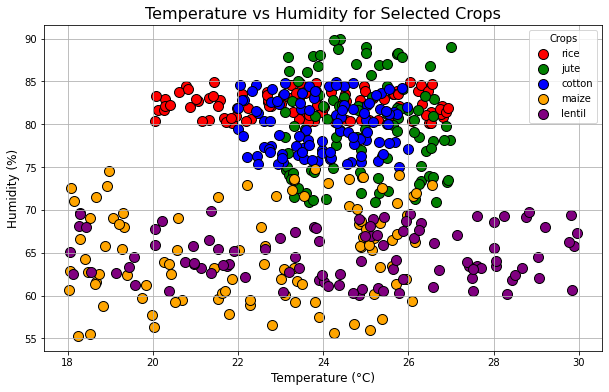

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the DataFrame for specific crops
crop_scatter = cropdf[cropdf['label'].isin(['rice', 'jute', 'cotton', 'maize', 'lentil'])]

# Set up a color map for the crops
crop_colors = {
    'rice': 'red', 
    'jute': 'green', 
    'cotton': 'blue', 
    'maize': 'orange', 
    'lentil': 'purple'
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each crop with a different color and marker
for crop in crop_colors:
    subset = crop_scatter[crop_scatter['label'] == crop]
    plt.scatter(subset['temperature'], subset['humidity'], 
                label=crop, 
                color=crop_colors[crop], 
                s=100, 
                edgecolor='black')

# Set the plot title and labels
plt.title("Temperature vs Humidity for Selected Crops", fontsize=16)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)

# Show grid lines for better readability
plt.grid(True)

# Add a legend to the plot
plt.legend(title="Crops", loc='upper right')

# Show the plot
plt.show()


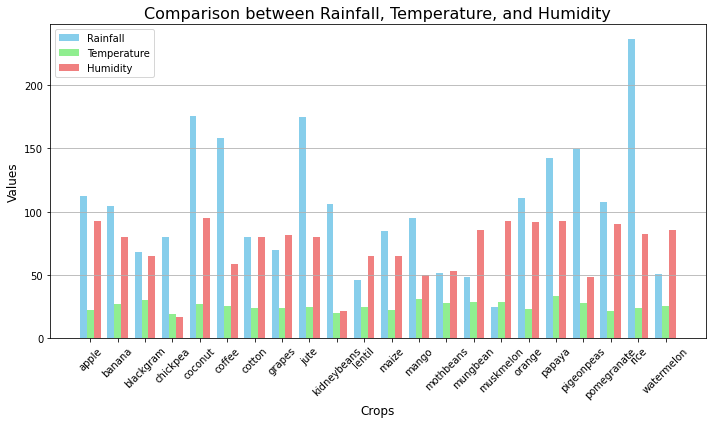

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting the necessary columns for plotting
rainfall = crop_summary['rainfall']
temperature = crop_summary['temperature']
humidity = crop_summary['humidity']
labels = crop_summary.index

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the bar width and positions for grouped bars
bar_width = 0.25
index = np.arange(len(labels))

# Create the bars for rainfall, temperature, and humidity
bar1 = ax.bar(index - bar_width, rainfall, bar_width, label="Rainfall", color='skyblue')
bar2 = ax.bar(index, temperature, bar_width, label="Temperature", color='lightgreen')
bar3 = ax.bar(index + bar_width, humidity, bar_width, label="Humidity", color='lightcoral')

# Set the title and labels
ax.set_title('Comparison between Rainfall, Temperature, and Humidity', fontsize=16)
ax.set_xlabel('Crops', fontsize=12)
ax.set_ylabel('Values', fontsize=12)

# Set x-ticks to the middle of each group of bars
ax.set_xticks(index)
ax.set_xticklabels(labels, rotation=45)

# Display the gridlines for better readability
ax.grid(True, axis='y')

# Add the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


## Correlation between different features 

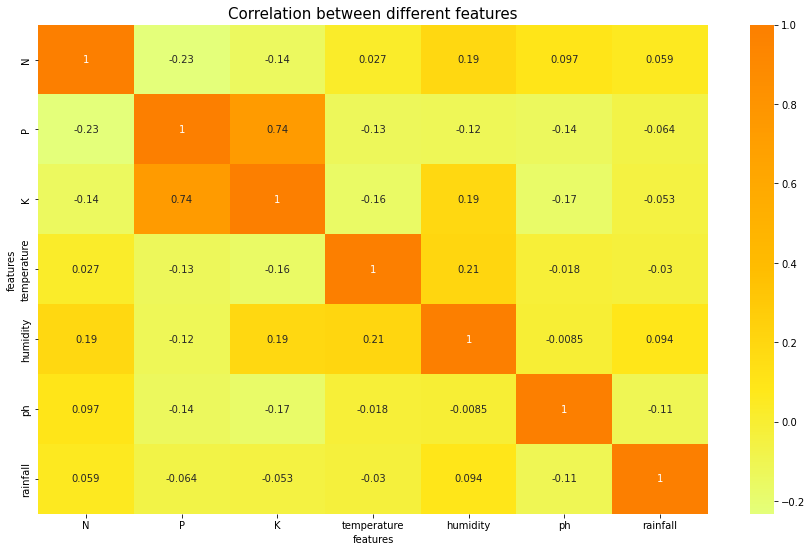

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(cropdf.corr(), annot=True,cmap='Wistia' )
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

# Declare independent and target variables

In [42]:
X = cropdf.drop('label', axis=1)
y = cropdf['label']

# Split dataset into training and test set

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    shuffle = True, random_state = 0)

# LightGBM Model Building and Training

In [44]:
# 📦 Imports
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

# 📥 Load data
df = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')

# 🎯 Features and Labels
X = df.drop('label', axis=1)
y = df['label']

# 🔢 Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ✂️ Split the data (already done)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, shuffle=True, random_state=0)

# 🔄 Scale features for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧠 Neural Network prep: One-hot encode targets
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# 📌 Store results
results = {}

# 1️⃣ Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))
results['RandomForest'] = rf_acc

# 2️⃣ LightGBM
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))
results['LightGBM'] = lgbm_acc

# 3️⃣ XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))
results['XGBoost'] = xgb_acc

# 4️⃣ Neural Network
nn = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_train_cat.shape[1], activation='softmax')
])
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn.fit(X_train_scaled, y_train_cat, epochs=50, batch_size=16, verbose=0)
nn_loss, nn_acc = nn.evaluate(X_test_scaled, y_test_cat, verbose=0)
results['NeuralNetwork'] = nn_acc

# 📊 Compare Results
print("\nModel Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")

# 🏆 Best Model
best_model = max(results, key=results.get)
print(f"\n✅ Best performing model: {best_model} with accuracy {results[best_model]:.4f}")



Model Comparison:
RandomForest: 0.9939
LightGBM: 0.9894
XGBoost: 0.9909
NeuralNetwork: 0.9848

✅ Best performing model: RandomForest with accuracy 0.9939


we choose the best two to tune

In [45]:
!pip install scikit-optimize

In [46]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')
X = df.drop('label', axis=1)
y = LabelEncoder().fit_transform(df['label'])

# Split data (already assumed split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=True, random_state=0)

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 1️⃣ Bayesian Optimization for Random Forest
rf_search = BayesSearchCV(
    RandomForestClassifier(random_state=0),
    {
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 20),
        'min_samples_split': Integer(2, 10),
        'min_samples_leaf': Integer(1, 10)
    },
    n_iter=20,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_
rf_acc = accuracy_score(y_test, rf_best.predict(X_test))
print(f"✅ Tuned Random Forest Accuracy: {rf_acc:.4f}")
print(f"Best RF Params: {rf_search.best_params_}")


✅ Tuned Random Forest Accuracy: 0.9955
Best RF Params: OrderedDict([('max_depth', 20), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 300)])


In [47]:
import joblib

# Save the best model to a file
joblib.dump(rf_best, "best_random_forest_model_for_Crop_recommendation.pkl")

['best_random_forest_model_for_Crop_recommendation.pkl']